In [1]:
import os

os.listdir('/kaggle/input/')

['fish-image-classification']

In [3]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [4]:
import logging
tf.get_logger().setLevel(logging.ERROR)


In [5]:
#Importing the required libraies

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# The file paths are available

train_path = '/kaggle/input/fish-image-classification/Fish_image_Classification/data/train'
test_path = '/kaggle/input/fish-image-classification/Fish_image_Classification/data/test'
val_path = '/kaggle/input/fish-image-classification/Fish_image_Classification/data/val'

In [6]:
#Counting the training images count

train_path = "/kaggle/input/fish-image-classification/Fish_image_Classification/data/train"

# Loop through each fish folder
for fish_class in os.listdir(train_path):
    class_folder = os.path.join(train_path, fish_class)

    if os.path.isdir(class_folder):
        num_images = len(os.listdir(class_folder))
        print(f"{fish_class} → {num_images} images")

gilt_head_bream → 566 images
sea_bass → 538 images
trout → 580 images
black_sea_sprat → 569 images
red_mullet → 579 images
red_sea_bream → 571 images
shrimp → 576 images
hourse_mackerel → 573 images
striped_red_mullet → 547 images


In [7]:
#Training Data Generator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True
)

#Validation & Test Generator

val_test_datagen = ImageDataGenerator(rescale=1./255)

#Training Images

train_data = train_datagen.flow_from_directory(
    train_path, target_size=(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

#Validation Images

val_data = val_test_datagen.flow_from_directory(
    val_path, target_size=(224,224),
    batch_size=32,
    class_mode = 'categorical'
)

#Test Images

test_data = val_test_datagen.flow_from_directory(
    test_path, target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5099 images belonging to 9 classes.
Found 895 images belonging to 9 classes.
Found 2654 images belonging to 9 classes.


In [8]:
print(train_data.class_indices)

{'black_sea_sprat': 0, 'gilt_head_bream': 1, 'hourse_mackerel': 2, 'red_mullet': 3, 'red_sea_bream': 4, 'sea_bass': 5, 'shrimp': 6, 'striped_red_mullet': 7, 'trout': 8}


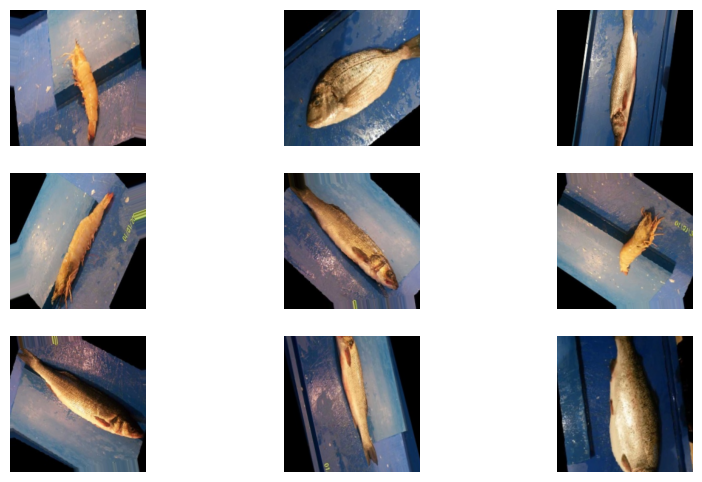

In [9]:
#Visualize Sample Images
images, lables = next(train_data)

plt.figure(figsize=(10,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.axis('off')
plt.show()


# CNN model

In [10]:
#CNN Layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Input(shape=(224,224,3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

I0000 00:00:1770306810.209553      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770306810.215814      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN Model

In [11]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1770306820.265456     150 service.cc:152] XLA service 0x791620006470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770306820.265493     150 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1770306820.265497     150 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1770306820.677713     150 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-05 15:53:43.284015: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 15:53:43.432503: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


  2/160 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.1016 - loss: 3.4099 

I0000 00:00:1770306826.420720     150 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


160/160 ━━━━━━━━━━━━━━━━━━━━ 106s 612ms/step - accuracy: 0.2139 - loss: 2.2181 - val_accuracy: 0.5095 - val_loss: 1.3474
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 360ms/step - accuracy: 0.5123 - loss: 1.3175 - val_accuracy: 0.7430 - val_loss: 0.8074
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 355ms/step - accuracy: 0.6121 - loss: 1.0289 - val_accuracy: 0.8000 - val_loss: 0.6718
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 350ms/step - accuracy: 0.6809 - loss: 0.8477 - val_accuracy: 0.8514 - val_loss: 0.5246
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 364ms/step - accuracy: 0.7425 - loss: 0.7104 - val_accuracy: 0.8704 - val_loss: 0.3708
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 358ms/step - accuracy: 0.7777 - loss: 0.6355 - val_accuracy: 0.8659 - val_loss: 0.3660
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.8115 - loss: 0.5113 - val_accuracy: 0.9263 - val_loss: 0.2218
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 353ms/step - accuracy: 0.8280 - loss: 0.4617 - va

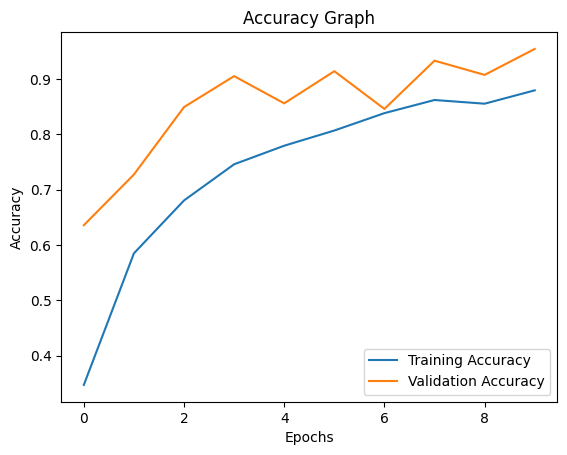

In [10]:
#Ploting accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

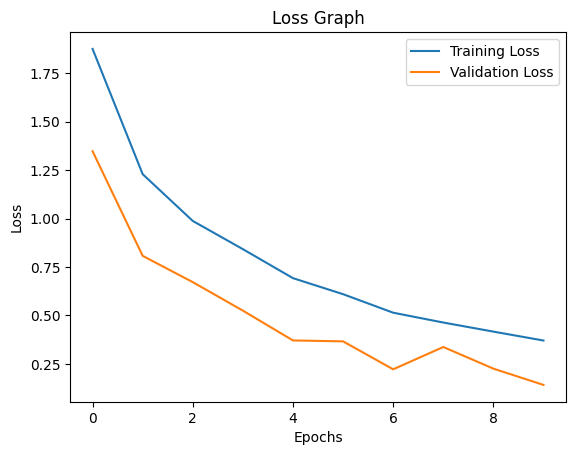

In [12]:
#Ploting loss graph

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
#Evaluating the Model

test_loss, test_accuracy = model.evaluate(test_data)

print("Test Accuracy:", test_accuracy)

83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.9618 - loss: 0.1215
Test Accuracy: 0.9536548852920532


In [15]:
#Predictions for classes

import numpy as np

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_data.classes

83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step


In [16]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[295   0   1   0   0   2   0   0   0]
 [  0 282   0   0   7  12   0   0   4]
 [  1   0 283   0   0   1   0   0   1]
 [  0   0   0 289   0   0   0   2   0]
 [  0  18   1   0 235  14   0   0   5]
 [ 14   5   2   0   0 305   0   1   0]
 [  0   0   0   0   0   0 285   4   0]
 [  8   0   0   0   1  19   0 265   0]
 [  0   0   0   0   0   0   0   0 292]]


In [15]:
#Classification Report

print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))

                    precision    recall  f1-score   support

   black_sea_sprat       0.89      1.00      0.94       298
   gilt_head_bream       0.92      0.58      0.71       305
   hourse_mackerel       0.96      0.93      0.94       286
        red_mullet       0.99      1.00      1.00       291
     red_sea_bream       1.00      0.68      0.81       273
          sea_bass       0.65      0.93      0.76       327
            shrimp       0.97      1.00      0.99       289
striped_red_mullet       0.91      0.92      0.91       293
             trout       0.94      1.00      0.97       292

          accuracy                           0.89      2654
         macro avg       0.92      0.89      0.89      2654
      weighted avg       0.91      0.89      0.89      2654



In [17]:
#Saving the model

# Save model in writable folder
model.save("/kaggle/working/cnn_fish_model.keras")

print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


# Transfer Learning

## VGG16

In [18]:
#VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

#Freezing the layers

for layer in base_model.layers:
    layer.trainable = False

#Custom Fish Layers

x = Flatten()(base_model.output)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(train_data.num_classes, activation='softmax')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)

#Compiling the VGG16 Model

vgg_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
#Training VGG16 Model

history_vgg = vgg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 109s 574ms/step - accuracy: 0.2161 - loss: 2.5181 - val_accuracy: 0.7341 - val_loss: 1.2771
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 64s 398ms/step - accuracy: 0.3935 - loss: 1.5014 - val_accuracy: 0.7642 - val_loss: 0.8593
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 389ms/step - accuracy: 0.4718 - loss: 1.2945 - val_accuracy: 0.8615 - val_loss: 0.6458
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 63s 390ms/step - accuracy: 0.5212 - loss: 1.1534 - val_accuracy: 0.9374 - val_loss: 0.4651
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 62s 389ms/step - accuracy: 0.5580 - loss: 1.0540 - val_accuracy: 0.9374 - val_loss: 0.3904


In [20]:
#Evaluating VGG16

vgg_loss, vgg_acc = vgg_model.evaluate(test_data)

print("VGG16 Test Accuracy:", vgg_acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 382ms/step - accuracy: 0.9463 - loss: 0.3868
VGG16 Test Accuracy: 0.9446119070053101


In [21]:
#Saving the model

# Save model in writable folder
model.save("/kaggle/working/vgg16_fish_model.keras")

print("✅ Model Saved Successfully!")

✅ Model Saved Successfully!


## ResNet50

In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze base layers
base_model.trainable = False

# Add classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(train_data.num_classes, activation="softmax")(x)

# Final model
resnet_model = Model(inputs=base_model.input, outputs=output)

# Compile
resnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train
history_resnet = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 88s 469ms/step - accuracy: 0.1197 - loss: 2.3752 - val_accuracy: 0.1598 - val_loss: 2.1577
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 359ms/step - accuracy: 0.1396 - loss: 2.2017 - val_accuracy: 0.2123 - val_loss: 2.1293
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 359ms/step - accuracy: 0.1565 - loss: 2.1541 - val_accuracy: 0.2268 - val_loss: 2.0983
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 367ms/step - accuracy: 0.2083 - loss: 2.1115 - val_accuracy: 0.2905 - val_loss: 2.0716
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 58s 365ms/step - accuracy: 0.1946 - loss: 2.0896 - val_accuracy: 0.2346 - val_loss: 2.0421


In [23]:
# Unfreeze last 30 layers
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

# Compile again with lower LR
resnet_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tune
history_resnet_finetune = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 90s 445ms/step - accuracy: 0.2057 - loss: 2.5158 - val_accuracy: 0.1832 - val_loss: 3.5906
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 369ms/step - accuracy: 0.4460 - loss: 1.5489 - val_accuracy: 0.4816 - val_loss: 1.5570
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 368ms/step - accuracy: 0.5960 - loss: 1.1977 - val_accuracy: 0.6101 - val_loss: 1.0569
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 372ms/step - accuracy: 0.6452 - loss: 0.9835 - val_accuracy: 0.7106 - val_loss: 0.8571
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 60s 375ms/step - accuracy: 0.6965 - loss: 0.8811 - val_accuracy: 0.7698 - val_loss: 0.6888


In [24]:
#Evaluating ResNet50 Model

resnet_loss, resnet_acc = resnet_model.evaluate(test_data)

print("ResNet50 Test Accuracy:", resnet_acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.8366 - loss: 0.5394
ResNet50 Test Accuracy: 0.777694046497345


In [25]:
#Saving ResNet50 Model

resnet_model.save("/kaggle/working/resnet50_fish_model.keras")
print("ResNet50 Model Saved Successfully!")

ResNet50 Model Saved Successfully!


## MobileNetV2

In [38]:
#Loading MobileNetV2 Model

from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

#Freezing the base layers

for layer in base_model.layers:
    layer.trainable = False

#Adding Fish Classifier Layers

x = Flatten()(base_model.output)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(train_data.num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=output)

#Compiling Model

mobilenet_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
#Training MobileNetV2

history_mobilenet = mobilenet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 447ms/step - accuracy: 0.4444 - loss: 4.9160 - val_accuracy: 0.8726 - val_loss: 0.3580
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 345ms/step - accuracy: 0.7037 - loss: 0.8367 - val_accuracy: 0.9609 - val_loss: 0.1509
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 346ms/step - accuracy: 0.7337 - loss: 0.7468 - val_accuracy: 0.9620 - val_loss: 0.1047
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 349ms/step - accuracy: 0.7667 - loss: 0.6091 - val_accuracy: 0.9743 - val_loss: 0.0867
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 347ms/step - accuracy: 0.7638 - loss: 0.5757 - val_accuracy: 0.9631 - val_loss: 0.1428


In [40]:
#Evaluating MobileNetV2

mob_loss, mob_acc = mobilenet_model.evaluate(test_data)

print("MobileNetV2 Test Accuracy:", mob_acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.9802 - loss: 0.0797
MobileNetV2 Test Accuracy: 0.9672192931175232


In [41]:
#Saving MobileNetV2 Model

mobilenet_model.save("/kaggle/working/mobilenetv2_fish_model.keras")
print("MobileNetV2 Model Saved Successfully!")

MobileNetV2 Model Saved Successfully!


## EfficientNetB0

In [31]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze base model
base_model.trainable = False

# Classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(train_data.num_classes, activation="softmax")(x)

efficientnet_model = Model(inputs=base_model.input, outputs=output)

# Compile
efficientnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train
history_effnet = efficientnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


2026-02-05 16:58:54.422621: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:58:54.565791: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:58:54.912933: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:58:55.053335: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:58:55.773572: E external/local_xla/xla/stream_

 32/160 ━━━━━━━━━━━━━━━━━━━━ 44s 345ms/step - accuracy: 0.1144 - loss: 2.2310

2026-02-05 16:59:18.226277: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:59:18.363307: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:59:18.675725: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:59:18.815320: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 16:59:19.528943: E external/local_xla/xla/stream_

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.1075 - loss: 2.2196

2026-02-05 17:00:20.056214: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:00:20.199344: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:00:20.547910: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:00:20.688078: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:00:21.409023: E external/local_xla/xla/stream_

160/160 ━━━━━━━━━━━━━━━━━━━━ 106s 517ms/step - accuracy: 0.1074 - loss: 2.2196 - val_accuracy: 0.1263 - val_loss: 2.1990
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 347ms/step - accuracy: 0.1034 - loss: 2.2133 - val_accuracy: 0.1050 - val_loss: 2.2013
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 348ms/step - accuracy: 0.1029 - loss: 2.2019 - val_accuracy: 0.1084 - val_loss: 2.1990
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 347ms/step - accuracy: 0.1185 - loss: 2.2018 - val_accuracy: 0.1006 - val_loss: 2.1993
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 353ms/step - accuracy: 0.1037 - loss: 2.2004 - val_accuracy: 0.1263 - val_loss: 2.1969


In [32]:
# Unfreeze last 20 layers
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

efficientnet_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_effnet_finetune = efficientnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 103s 487ms/step - accuracy: 0.1240 - loss: 2.2205 - val_accuracy: 0.1263 - val_loss: 2.1981
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 350ms/step - accuracy: 0.1047 - loss: 2.2145 - val_accuracy: 0.1263 - val_loss: 2.1972
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 347ms/step - accuracy: 0.1152 - loss: 2.2061 - val_accuracy: 0.1084 - val_loss: 2.1962
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 351ms/step - accuracy: 0.1128 - loss: 2.2059 - val_accuracy: 0.1497 - val_loss: 2.1968
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 56s 348ms/step - accuracy: 0.1193 - loss: 2.2005 - val_accuracy: 0.1095 - val_loss: 2.1963


In [33]:
#Evaluating EfficientNetB0 Model

eff_loss, eff_acc = efficientnet_model.evaluate(test_data)

print("EfficientNetB0 Test Accuracy:", eff_acc)

82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1385 - loss: 2.2082

2026-02-05 17:11:41.241196: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:11:41.384046: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:11:41.731226: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:11:41.871447: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-05 17:11:42.589588: E external/local_xla/xla/stream_

83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.1378 - loss: 2.2079
EfficientNetB0 Test Accuracy: 0.10813865810632706


In [34]:
#Saving EfficientNetB0 Model

efficientnet_model.save("/kaggle/working/efficientnetb0_fish_model.keras")
print("EfficientNetB0 Model Saved Successfully!")

EfficientNetB0 Model Saved Successfully!


# Choosing the best model

In [42]:
model_results = {
    "CNN": test_accuracy,
    "VGG16": vgg_acc,
    "ResNet50": resnet_acc,
    "MobileNetV2": mob_acc,
    "EfficientNetB0": eff_acc
}

print(model_results)

{'CNN': 0.9536548852920532, 'VGG16': 0.9446119070053101, 'ResNet50': 0.777694046497345, 'MobileNetV2': 0.9672192931175232, 'EfficientNetB0': 0.10813865810632706}


In [43]:
#Creating Comparison Table

import pandas as pd

df_results = pd.DataFrame(model_results.items(), columns=["Model Name", "Test Accuracy"])

df_results = df_results.sort_values(by="Test Accuracy", ascending=False)

df_results

,Model Name,Test Accuracy
3,MobileNetV2,0.967219
0,CNN,0.953655
1,VGG16,0.944612
2,ResNet50,0.777694
4,EfficientNetB0,0.108139


In [44]:
#Displaying the best model

best_model_name = df_results.iloc[0]["Model Name"]
best_accuracy = df_results.iloc[0]["Test Accuracy"]

print("Best Model:", best_model_name)
print("Best Accuracy:", best_accuracy)


Best Model: MobileNetV2
Best Accuracy: 0.9672192931175232


In [46]:
#Saving the best model

mobilenet_model.save("/kaggle/working/BEST_FISH_MODEL.keras")
print("Best Model Saved as BEST_FISH_MODEL.keras")

Best Model Saved as BEST_FISH_MODEL.keras


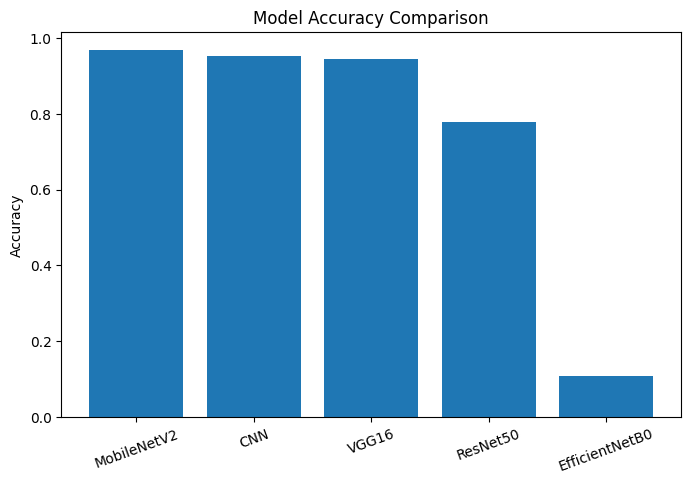

In [47]:
#Accuray comparison

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_results["Model Name"], df_results["Test Accuracy"])
plt.xticks(rotation=20)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [48]:
#Confusion matrix for the best model

y_pred = efficientnet_model.predict(test_data)
y_pred_classes = y_pred.argmax(axis=1)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_data.classes, y_pred_classes)

print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(test_data.classes, y_pred_classes))

83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step
Confusion Matrix:
 [[  0   0 298   0   0   0   0   0   0]
 [  0   0 305   0   0   0   0   0   0]
 [  0   0 286   0   0   0   0   0   0]
 [  0   0 291   0   0   0   0   0   0]
 [  0   0 273   0   0   0   0   0   0]
 [  0   0 327   0   0   0   0   0   0]
 [  0   0 288   0   0   0   1   0   0]
 [  0   0 293   0   0   0   0   0   0]
 [  0   0 292   0   0   0   0   0   0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       298
           1       0.00      0.00      0.00       305
           2       0.11      1.00      0.19       286
           3       0.00      0.00      0.00       291
           4       0.00      0.00      0.00       273
           5       0.00      0.00      0.00       327
           6       1.00      0.00      0.01       289
           7       0.00      0.00      0.00       293
           8       0.00      0.00      0.00       292

    accuracy        

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
